In [ ]:
import os
import sys
from pathlib import Path

module_path = os.path.abspath(os.path.join('../utils'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import scipy as sc
import matplotlib.pyplot as plt

from plot_utils import hist_to_curve

In [15]:
# set parameters

V0 = 4.5
Vmin  = V0 * 0.6
Vmax  = V0 * 3.5
stdV0 = V0 * 0.4

In [24]:
# draw volumes from truncated distribution

Ncells  = 588
volumes_sim  = sc.stats.truncnorm((Vmin-V0)/stdV0, (Vmax-V0)/stdV0, loc=V0, scale=stdV0).rvs(Ncells)
volumes_theo = sc.stats.truncnorm((Vmin-V0)/stdV0, (Vmax-V0)/stdV0, loc=V0, scale=stdV0).rvs(100_000)

In [31]:
# transform histogram to curve

values_sim,  counts_sim,  _ = hist_to_curve(volumes_sim  / V0, bins=12)
values_theo, counts_theo, _ = hist_to_curve(volumes_theo / V0, bins=20)

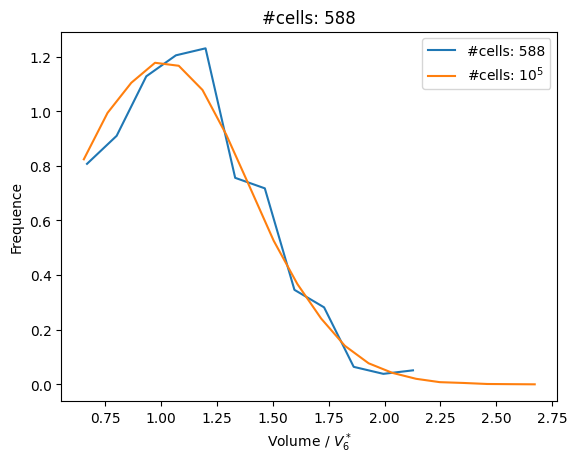

In [ ]:
# plot figure

plt.plot(values_sim,  counts_sim,  label=rf"#cells: {Ncells}")
plt.plot(values_theo, counts_theo, label=rf"#cells: $10^5$")
plt.xlabel(r"Volume / $V_6^*$")
plt.ylabel("Frequence")
plt.title(f"#cells: {Ncells}")
plt.legend();